In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load dataset
df = pd.read_csv('Churn_Modelling.csv')


<Axes: xlabel='Exited', ylabel='Gender'>

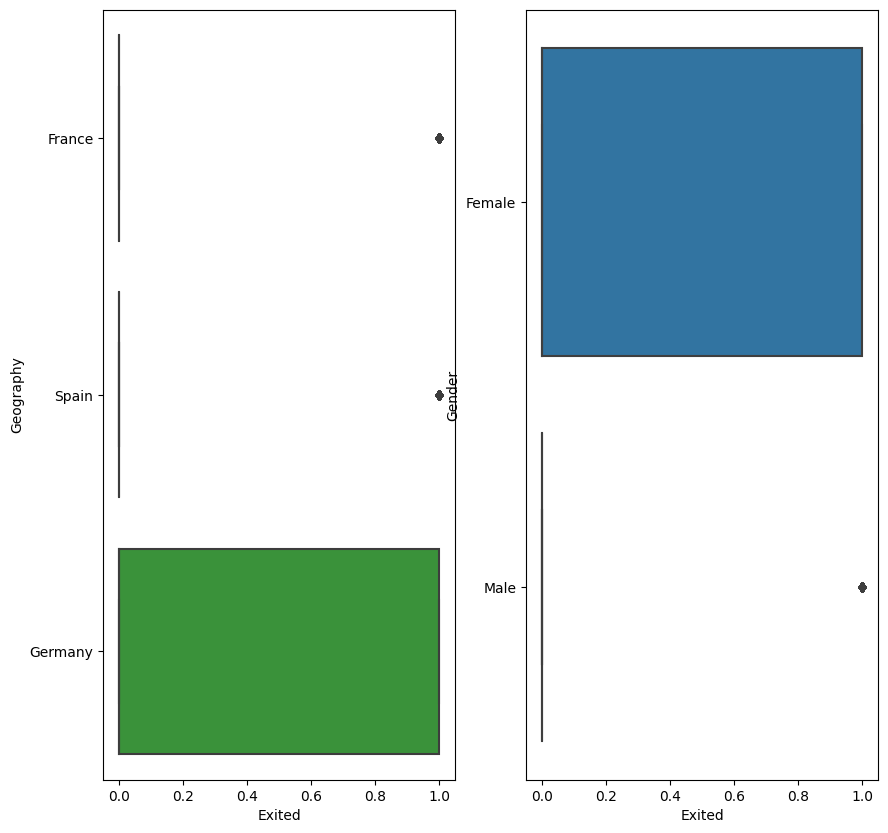

In [35]:
import matplotlib.pyplot as plt

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,10))
sns.boxplot(x='Exited', y='Geography', ax=ax1, data=df)
sns.boxplot(x='Exited', y='Gender', ax=ax2, data=df)


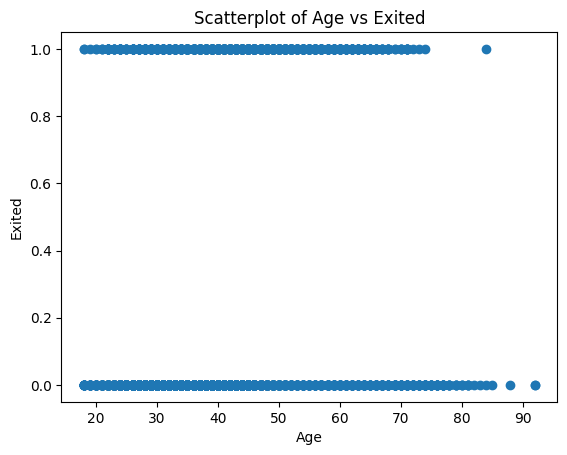

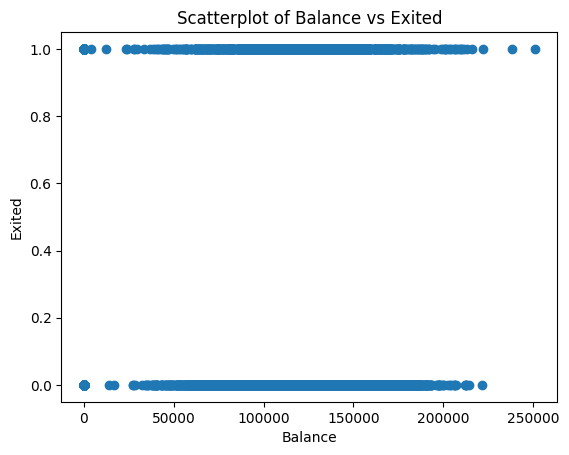

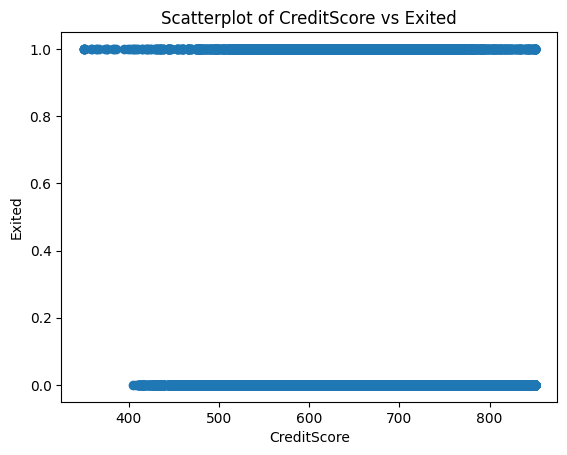

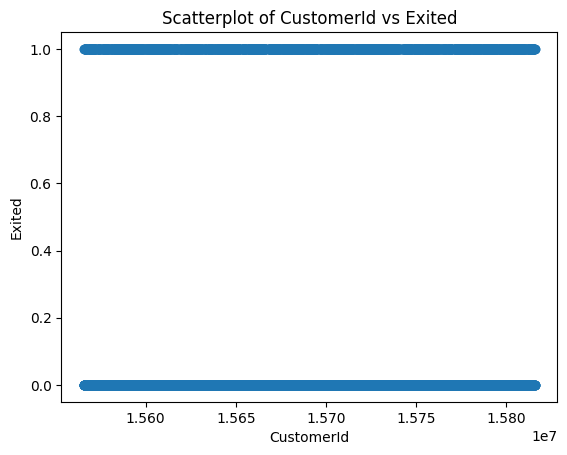

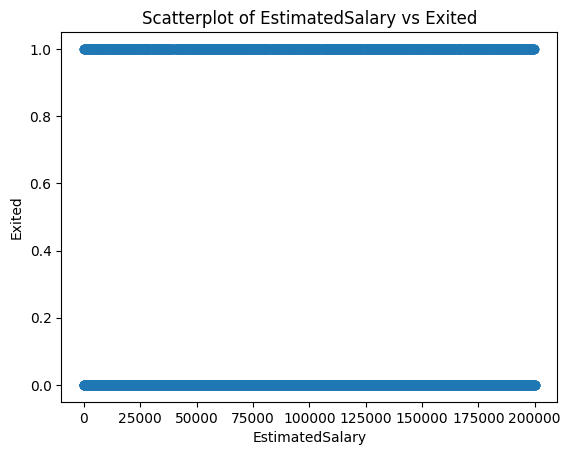

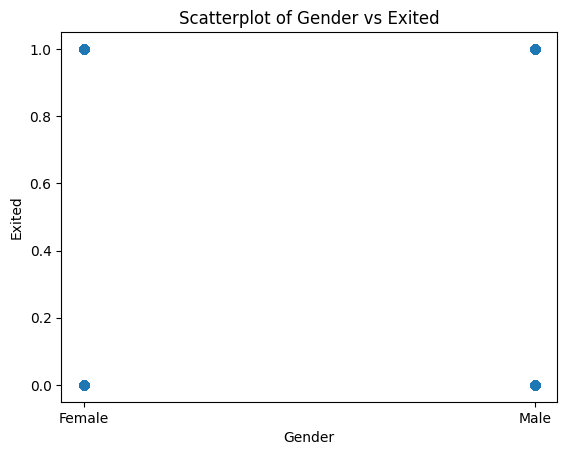

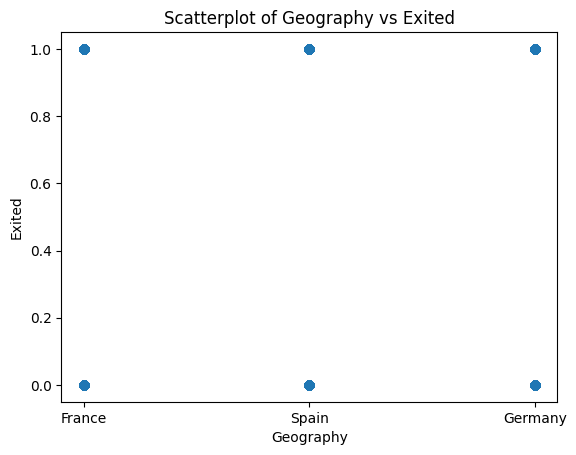

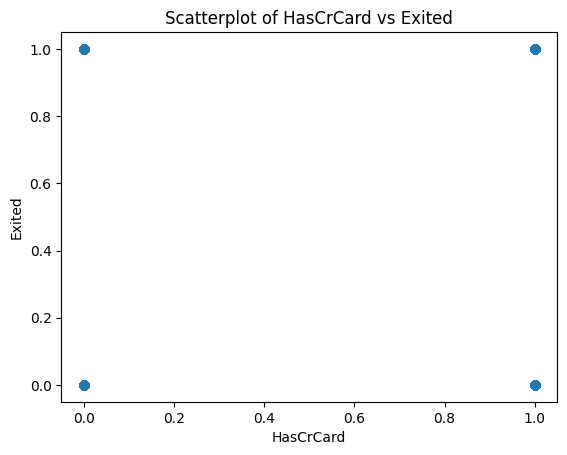

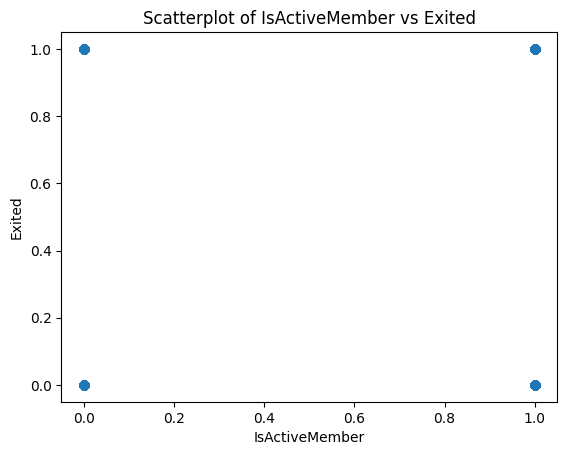

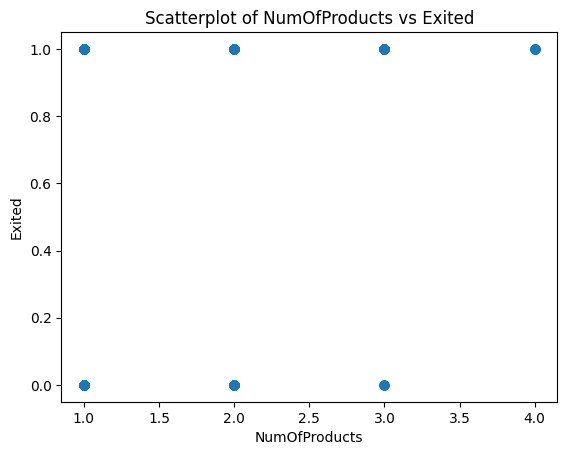

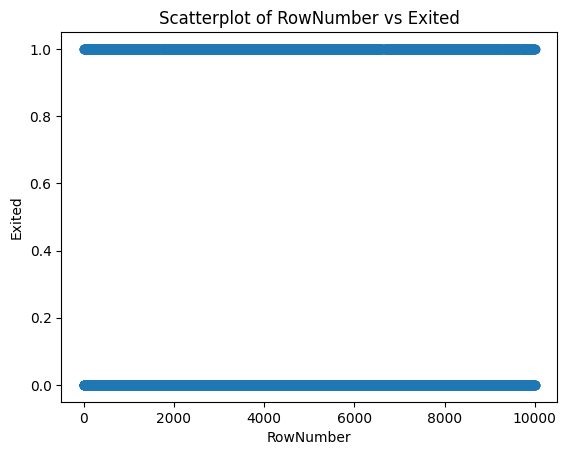

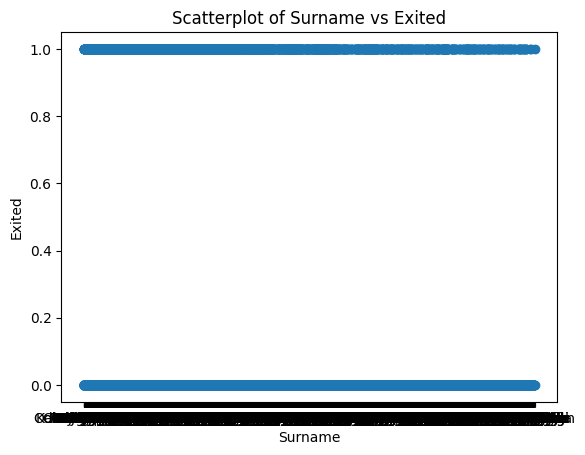

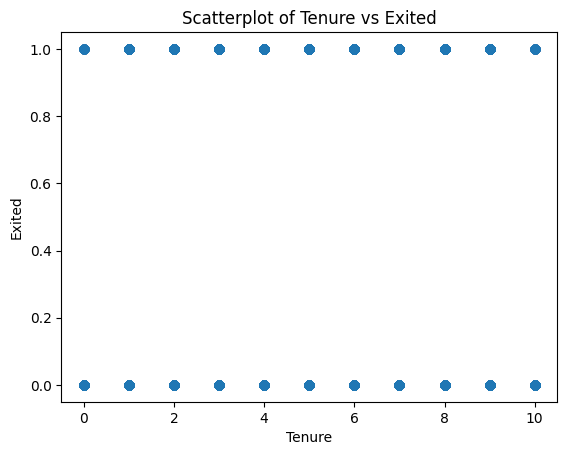

In [36]:
columns = df.columns.difference(['Exited'])

# Specify the 'Exited' column
target_column = 'Exited'

# Create scatterplots for each column against the 'Exited' column
for column in columns:
    x = df[column]
    y = df[target_column]
    
    # Create a scatterplot
    plt.scatter(x, y)
    
    # Customize the plot (optional)
    plt.title(f'Scatterplot of {column} vs {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    
    # Show the plot
    plt.show()

In [37]:
cat_columns = ['Geography','Gender']
num_columns = ['CreditScore','Age','Tenure', 'Balance','NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = ['Exited']

# Specify the numerical columns
num_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the selected columns
df[num_columns] = scaler.fit_transform(df[num_columns])

cat_columns = ['Geography', 'Gender']

# Create dummy variables
X = pd.concat([df[num_columns], pd.get_dummies(df[cat_columns], drop_first=True)], axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 123)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.1+ MB


In [39]:

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)



C:\Users\hp\AppData\Local\Temp\ipykernel_3376\2318388408.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [41]:
# Random Forest feature importance
rf_importance = rf_model.feature_importances_
print(f"Random Forest Feature Importance: {rf_importance}")

# Logistic Regression feature importance (coefficients)
lr_importance = lr_model.coef_
print(f"Logistic Regression Coefficients: {lr_importance}")


Random Forest Feature Importance: [0.14270597 0.23944845 0.08418343 0.14062086 0.12661079 0.01933461
 0.04206126 0.14642801 0.02609601 0.01400301 0.01850761]
Logistic Regression Coefficients: [[-0.07796068  0.74261412 -0.06500748  0.19203366 -0.03213674 -0.00282925
  -0.51561306  0.0231551   0.75986271  0.04745521 -0.50923356]]
